Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2025-01-14 12:09:48.912209: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2025-01-14 12:09:48.912274: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1c:00.0, compute capability: 7.5


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

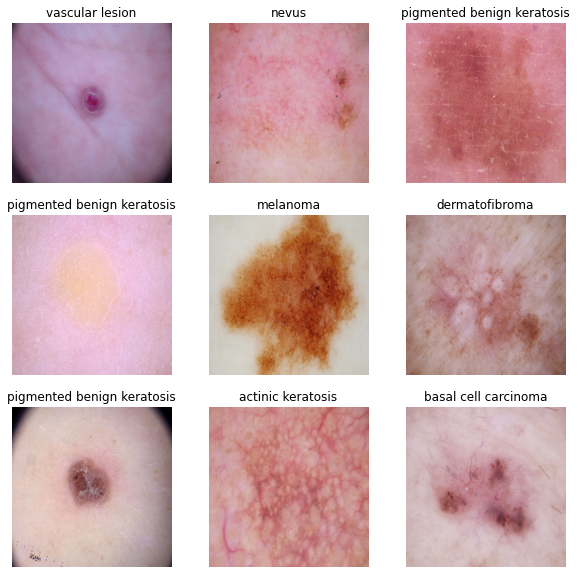

In [8]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
target_labels = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_2 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4

### Train the model

In [15]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2025-01-14 12:16:32.619548: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


56/56 [==============================] - 17s 80ms/step - loss: 6.0049 - accuracy: 0.3421 - val_loss: 2.2751 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4078 - accuracy: 0.5134 - val_loss: 2.5063 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1401 - accuracy: 0.5915 - val_loss: 2.7103 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.0193 - accuracy: 0.6373 - val_loss: 2.4169 - val_accuracy: 0.1633
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 0.8732 - accuracy: 0.6819 - val_loss: 2.0821 - val_accuracy: 0.2528
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 0.7411 - accuracy: 0.7316 - val_loss: 2.0004 - val_accuracy: 0.3356
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 0.6702 - accuracy: 0.7539 - val_loss: 1.8203 - val_accuracy: 0.3691
Epoch 8/20
56/56 [=====

### Visualizing training results

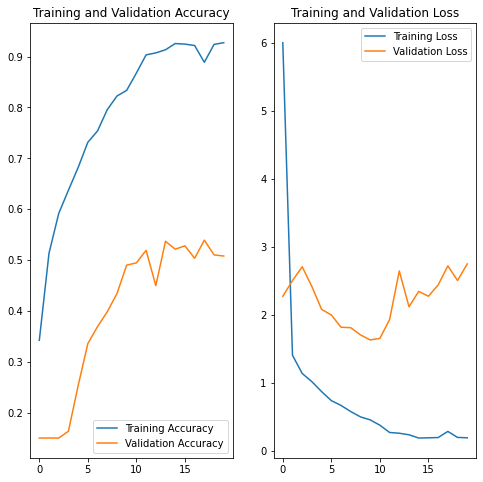

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Looks like the model is overfitting. The training accuracy is around 92%, but the validation accuracy is only 50%. The model is not doing well with unseen data.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

augmented_images = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

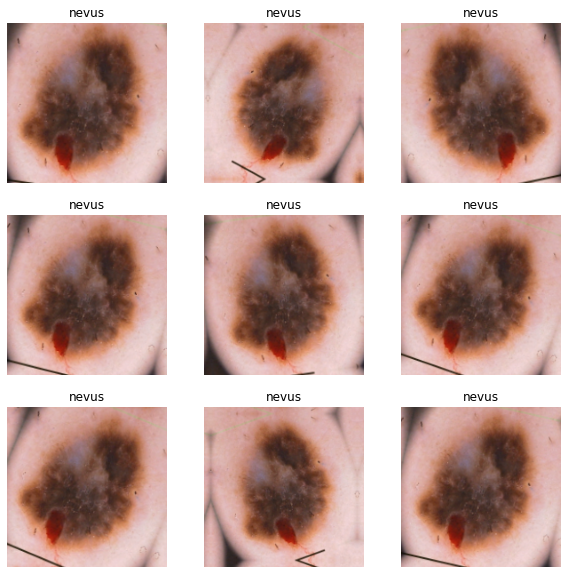

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_image_list = augmented_images(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image_list[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [24]:
%%time
##The above command is added to find out the training time of the model
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 26ms/step - loss: 4.3532 - accuracy: 0.2539 - val_loss: 2.2246 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.7738 - accuracy: 0.3722 - val_loss: 2.2397 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.6693 - accuracy: 0.4213 - val_loss: 2.2025 - val_accuracy: 0.1544
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5805 - accuracy: 0.4263 - val_loss: 2.1500 - val_accuracy: 0.2349
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5021 - accuracy: 0.4448 - val_loss: 1.9040 - val_accuracy: 0.3490
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4303 - accuracy: 0.4743 - val_loss: 1.6239 - val_accuracy: 0.4027
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4060 - accuracy: 0.4794 - val_loss: 1.7750 - val_accuracy: 0.3557
Epoch 8/20
56

### Visualizing the results

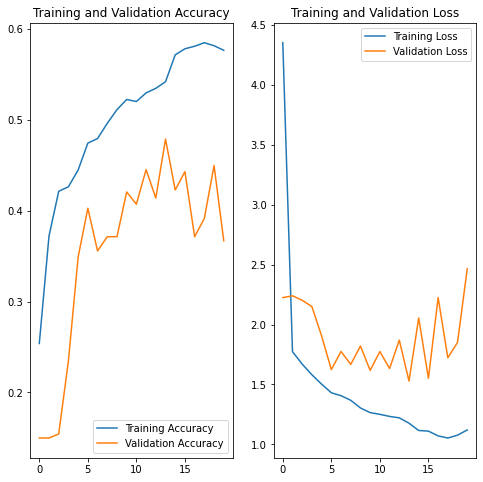

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Now the model is no longer overfitting. But, both the training and validation accuracies are low. The model is underfitting now

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [49]:
## Your code goes here.


from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
#path_list

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
#lesion_list

In [52]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [53]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [54]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

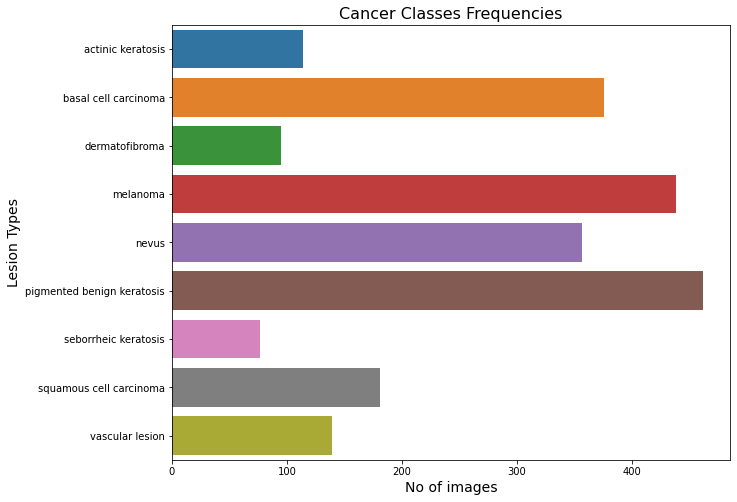

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=original_df)
plt.title('Cancer Classes Frequencies', fontsize=16)
plt.xlabel('No of images', fontsize=14)
plt.ylabel('Lesion Types', fontsize=14)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


- `Pigmented benign keratosis` has the highest number of samples
- The class `seborrheic keratosis` has the smallest proportion of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [57]:
!pip install Augmentor

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [60]:
path_to_training_dataset= str(data_dir_train)+'/'

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7781429D90>: 100%|██████████| 500/500 [00:03<00:00, 140.29 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F776D3B75E0>: 100%|██████████| 500/500 [00:04<00:00, 121.07 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F77814421F0>: 100%|██████████| 500/500 [00:04<00:00, 108.82 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F776D2B6CA0>: 100%|██████████| 500/500 [00:17<00:00, 28.55 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F776D383160>: 100%|██████████| 500/500 [00:10<00:00, 47.04 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7781429DC0>: 100%|██████████| 500/500 [00:03<00:00, 130.50 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F776D3AB100>: 100%|██████████| 500/500 [00:07<00:00, 67.76 Samples/s]                   


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7781442CD0>: 100%|██████████| 500/500 [00:04<00:00, 116.78 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F76DB676A00>: 100%|██████████| 500/500 [00:03<00:00, 136.02 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [61]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [63]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [64]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [65]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [66]:
print(list(dataframe_dict_new.items())[:5])

[('Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029460.jpg_8919111e-7e4c-4c56-98b6-0ac44b2e4254.jpg', 'actinic keratosis'), ('Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032854.jpg_85901e11-12c1-4bf8-a62b-6c7580617576.jpg', 'actinic keratosis'), ('Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026625.jpg_9faf18df-947c-4ef7-96a1-cdecdbef541e.jpg', 'actinic keratosis'), ('Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_5c43b586-d911-41ec-b8b7-912d26f33317.jpg', 'actinic keratosis'), ('Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027452.jpg_379becca-3c0b-46cd-8bdb-1d6782f6421e.jpg', '

In [67]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [68]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [69]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [70]:
# data_dir_train="path to directory with training data + data created using augmentor"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [72]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [73]:
## your code goes here

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [74]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [75]:
%%time
epochs = 50
## Your code goes here, use 50 epochs.
# history = # your model fit code

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 19s 104ms/step - loss: 2.7920 - accuracy: 0.2732 - val_loss: 2.2511 - val_accuracy: 0.1151
Epoch 2/50
169/169 [==============================] - 16s 90ms/step - loss: 1.6258 - accuracy: 0.4065 - val_loss: 2.3074 - val_accuracy: 0.1218
Epoch 3/50
169/169 [==============================] - 12s 68ms/step - loss: 1.3478 - accuracy: 0.5007 - val_loss: 1.4492 - val_accuracy: 0.4610
Epoch 5/50
169/169 [==============================] - 15s 84ms/step - loss: 1.2465 - accuracy: 0.5373 - val_loss: 1.3224 - val_accuracy: 0.5204
Epoch 6/50
169/169 [==============================] - 13s 75ms/step - loss: 1.1848 - accuracy: 0.5553 - val_loss: 1.3442 - val_accuracy: 0.4929
Epoch 7/50
169/169 [==============================] - 11s 61ms/step - loss: 1.1018 - accuracy: 0.5974 - val_loss: 1.2061 - val_accuracy: 0.5754
Epoch 8/50
169/169 [==============================] - 11s 63ms/step - loss: 1.0588 - accuracy: 0.6050 - val_loss: 1.7670 - val_accuracy

#### **Todo:**  Visualize the model results

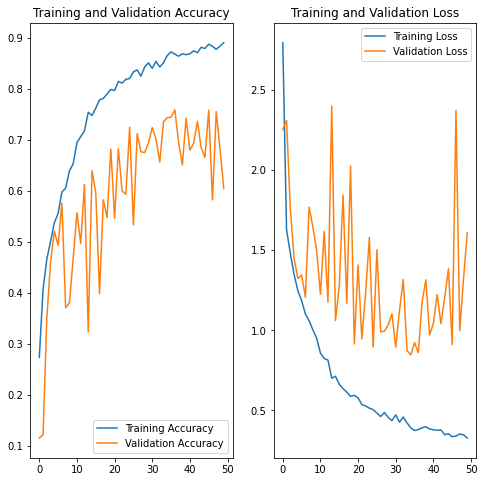

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance helped improving both the training & validation accuracies a bit. But, the model looks like it is overfitting still. Lets add more layers to the neural network.

In [77]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3, 3), padding='same'),
  layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(64, activation=tf.nn.relu),
  layers.Dropout(0.1),
  layers.Dense(target_labels, activation='softmax')
])

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
%%time
epochs = 50
## Your code goes here, use 50 epochs.
# history = # your model fit code

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 12s 64ms/step - loss: 2.0385 - accuracy: 0.3016 - val_loss: 2.5839 - val_accuracy: 0.1151
Epoch 2/50
169/169 [==============================] - 12s 66ms/step - loss: 1.5958 - accuracy: 0.3924 - val_loss: 2.1042 - val_accuracy: 0.2279
Epoch 3/50
169/169 [==============================] - 13s 75ms/step - loss: 1.4440 - accuracy: 0.4349 - val_loss: 1.7226 - val_accuracy: 0.3667
Epoch 4/50
169/169 [==============================] - 11s 61ms/step - loss: 1.3550 - accuracy: 0.4826 - val_loss: 1.8629 - val_accuracy: 0.3734
Epoch 5/50
169/169 [==============================] - 10s 57ms/step - loss: 1.2739 - accuracy: 0.4976 - val_loss: 1.2484 - val_accuracy: 0.5264
Epoch 6/50
169/169 [==============================] - 12s 71ms/step - loss: 1.1862 - accuracy: 0.5423 - val_loss: 1.5299 - val_accuracy: 0.4083
Epoch 7/50
169/169 [==============================] - 15s 85ms/step - loss: 1.0962 - accuracy: 0.5783 - val_loss: 1.3929 - val_accuracy: 0.4699
Epo

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()